# Task 2 - Prediction Using Unsupervised Learning
## K-Means Clustering
In this task, we are going to visualise and predict the optimum numbers of clusters using the Iris dataset.

### **Author: Moksh Jaiswal**

In [2]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

In [3]:
# Importing and Creating the dataframe of the 'Iris' dataset.
iris_df = pd.read_csv("C:/Users/pc/Sparks Foundation/Project 2 Unsupervised ML/Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
distinct_species = iris_df['Species'].unique()
print(distinct_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Understanding the data and checking for null values. 

In [13]:
x = iris_df.iloc[:,1:5].values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Now, creating an array "x" including only feature variables. The target variable is excluded.

### Now finding the optimum number of clusters for K Means.

In [8]:
# Finding the optimum number of clusters for K-Means classification.

from sklearn.cluster import KMeans
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Here, the code `kmeans = KMeans(n_clusters = i)` will also give the same result as the remainig arguments will have the same mentioned values by default.

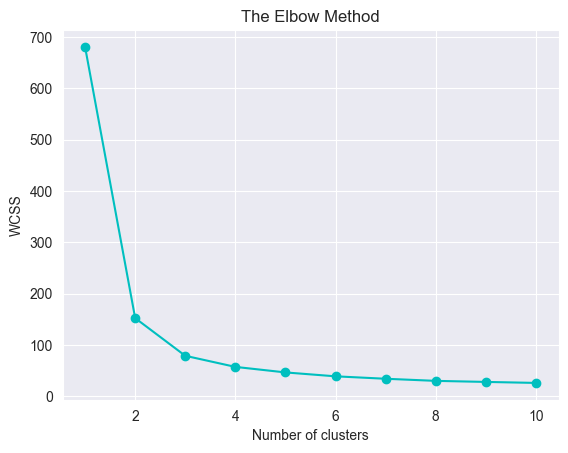

In [45]:
# Plotting the results onto a line graph
# Allowing us to observe 'The Elbow' curve

sns.set_style('darkgrid')
sns.set_palette('muted')
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-', color = 'c')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within Cluster Sum of Squares
plt.show()

We can clearly see why it is called **"The Elbow Method"**. The idea is to plot the within-cluster sum of squares (WCSS) for a range of k values and look for the **"elbow"** point on the graph. The elbow point is the value of k where the rate of decrease in WCSS slows down, indicating a good balance between the number of clusters and the clustering quality.

Here, it can be witnessed from the graph that value of **K** i.e. the optimum number of clusters is **3**.

### Now, let's create the K-means classifier by applying the obtained K-mean value to the dataset and make predictions.

In [11]:
# Creating the kmean classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                random_state = 0)
y_predict = kmeans.fit_predict(x)

### We will now visualise the clusters.

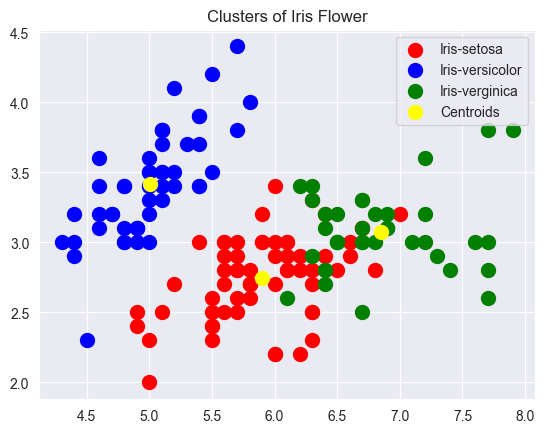

In [27]:
# Visualising the clusters

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
               s = 100, c = 'red', label = 'Iris-setosa')# for first cluster

plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
               s = 100, c = 'blue', label = 'Iris-versicolor')# for second cluster

plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], 
               s = 100, c = 'green',label = 'Iris-verginica' )# for third cluster


# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Iris Flower')
plt.legend()
plt.show()

# Task Successfully Completed!
### Thank You 